In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [2]:
ad0=pd.read_csv('application_data.csv')
pa0=pd.read_csv('previous_application.csv')

# Few abs that will help you to understand the dataFrame better
    - ad0  --> Application Data
    - pa0  --> Previous Application
    - ad0_0 -> People who pay loan on time
    - ad0_1 -> People who have problem in paying loan on time
    - ad1  --> Its the combination of the dataFrame ad0_0 and ad0_1
    - joined-> Its the combination of the dataFrame ad1 and pa0

# Working on Application DataFrame

In [3]:
ad0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
ad0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
ad0.shape

(307511, 122)

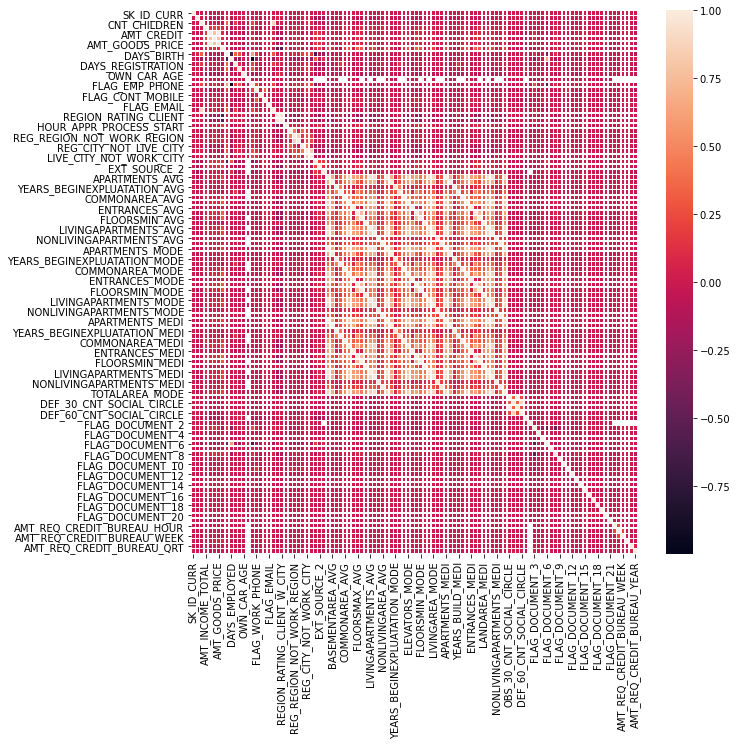

In [6]:
corrt = ad0.corr() 
  
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrt, ax = ax,linewidths=.5) 
plt.show()

In [7]:
corrmat = ad0.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(20)

,Var1,Var2,Correlation
7569,LIVINGAREA_MEDI,LIVINGAREA_AVG,1.00
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,1.00
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,1.00
7034,ENTRANCES_MEDI,ENTRANCES_AVG,1.00
1493,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
6392,APARTMENTS_MEDI,APARTMENTS_AVG,1.00
6927,ELEVATORS_MEDI,ELEVATORS_AVG,1.00
6820,COMMONAREA_MEDI,COMMONAREA_AVG,1.00


## Finding the missing value and treating them

In [8]:
ad0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
(ad0.isnull().sum()/ad0.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## Drop the columns which are having more then 60% of missing Value

In [10]:
ad0.drop(axis=1,inplace=True,columns=['OWN_CAR_AGE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG',
                                     'NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE'
                                     ,'LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI'
                                     ,'FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
                                     ])

In [11]:
(ad0.isnull().sum()/ad0.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

## Working on more then 40 % if they are not important we will drop them too

In [12]:
ad0[~ad0.APARTMENTS_AVG.isnull()].describe().head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151444.000000,151325.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151449.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,69025.000000,151151.000000,122559.000000,151450.00000,126284.000000,150653.000000,141607.000000,149028.00000,150556.000000,123700.000000,147288.000000,136269.000000,151450.000000,126284.000000,150653.000000,141607.000000,149028.000000,150556.000000,123700.000000,147288.000000,136269.000000,151450.00000,126284.000000,150653.000000,141607.000000,149028.000000,150556.000000,123700.000000,147288.000000,136269.000000,151278.000000,150833.000000,150833.000000,150833.000000,150833.000000,151449.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.00000,151450.000000,151450.000000,151450.0000,151450.000000,151450.000000,151450.000000,151450.000000,151450.000000,151450.00000,151450.000000,151450.000000,151450.000000,151450.00000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000
mean,278339.382516,0.069594,0.389792,180639.816269,622236.011093,28084.650798,561505.647527,0.022391,-16122.443433,62250.715272,-5221.133576,-3015.653562,0.999993,0.823995,0.176316,0.997715,0.310987,0.066405,2.094467,1.980938,1.945117,12.301618,0.012162,0.045989,0.039214,0.035431,0.119492,0.101829,0.521324,0.538276,0.513186,0.11744,0.088471,0.977693,0.078806,0.15018,0.227375,0.066516,0.108657,0.028154,0.114231,0.087544,0.976996,0.074308,0.145574,0.223331,0.065128,0.107101,0.026789,0.11785,0.087979,0.977711,0.077934,0.149657,0.226981,0.067351,0.109864,0.028021,0.104099,1.384206,0.138643,1.368407,0.096226,-988.360108,0.000053,0.695226,0.000073,0.015299,0.086491,0.000231,0.08758,0.004853,0.000033,0.0048,0.000013,0.004411,0.004331,0.001453,0.012017,0.00035,0.008927,0.000693,0.000634,0.00035,0.006926,0.007908,0.035097,0.315018,0.267497,1.888267


In [13]:
ad0[ad0.APARTMENTS_AVG.isnull()].describe().head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,156061.000000,156061.000000,156061.000000,156061.00000,156061.000000,156055.000000,155908.000000,156061.00000,156061.00000,156061.000000,156061.000000,156061.000000,156061.0,156061.000000,156061.00000,156061.000000,156061.00000,156061.000000,156060.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.00000,156061.000000,156061.000000,156061.000000,65108.000000,155700.000000,123987.000000,0.0,1284.000000,6851.000000,2013.000000,3655.000000,3935.000000,1221.000000,5873.000000,1560.000000,0.0,1284.000000,6851.000000,2013.000000,3655.000000,3935.000000,1221.000000,5873.000000,1560.000000,0.0,1284.000000,6851.000000,2013.000000,3655.000000,3935.000000,1221.000000,5873.00000,1560.000000,7802.000000,155657.000000,155657.00000,155657.000000,155657.000000,156061.000000,156061.000000,156061.000000,156061.00000,156061.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.00000,156061.0,156061.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.000000,156061.0000,156061.000000,156061.00000,133587.000000,133587.000000,133587.000000,133587.000000,133587.000000,133587.000000
mean,278026.348453,0.091535,0.443506,157305.90466,576501.754541,26161.337432,515966.081824,0.01939,-15954.07137,65333.156605,-4758.050813,-2973.384984,1.0,0.815905,0.22174,0.998539,0.25203,0.047321,2.209144,2.121875,2.115372,11.832258,0.018038,0.055408,0.04206,0.119652,0.338137,0.254984,0.481781,0.491207,0.508546,NaN,0.085599,0.978655,0.088479,0.131146,0.184449,0.047855,0.075844,0.046186,NaN,0.087459,0.978587,0.087244,0.129627,0.183428,0.047658,0.077729,0.047446,NaN,0.085613,0.978659,0.088227,0.131118,0.184413,0.048664,0.07707,0.047016,0.072456,1.459106,0.14805,1.441034,0.103754,-938.111098,0.000032,0.724383,0.00009,0.014936,0.089574,0.000154,0.075355,0.002967,0.000013,0.00305,0.0,0.002666,0.001583,0.000974,0.007901,0.000186,0.007356,0.0005,0.000384,0.00032,0.005884,0.006101,0.033634,0.220194,0.263469,1.911578


In [14]:
ad0.FLAG_DOCUMENT_6.value_counts(normalize=True)

0    0.911945
1    0.088055
Name: FLAG_DOCUMENT_6, dtype: float64

In [15]:
ad0.EXT_SOURCE_1.describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [16]:
ad0.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [17]:
ad0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.078942,0.149725,0.226282,0.066333,0.107399,0.028358,0.114231,0.087543,0.977065,0.074490,0.145193,0.222315,0.064958,0.105975,0.027022,0.117850,0.087955,0.977752,0.078078,0.149213,0.225897,0.067169,0.108607,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,

# Removing unwanted columns as they won't help in our analysis 

In [18]:
ad0.drop(axis=1,inplace=True,columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                                      'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10'
                                      ,'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                                      'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                                      'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','APARTMENTS_AVG','BASEMENTAREA_AVG',
                                      'YEARS_BEGINEXPLUATATION_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG',
                                      'LIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
                                      'YEARS_BEGINEXPLUATATION_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
                                      'LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
                                      'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
                                      'FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','HOUSETYPE_MODE',
                                      'TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','EXT_SOURCE_1','EXT_SOURCE_2',
                                      'EXT_SOURCE_3'
                                     ])

In [19]:
ad0.shape

(307511, 51)

In [20]:
ad0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
(ad0.isnull().sum()/ad0.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## Working on Null Values

In [22]:
ad0.OBS_30_CNT_SOCIAL_CIRCLE=ad0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0)

ad0.DAYS_LAST_PHONE_CHANGE=ad0.DAYS_LAST_PHONE_CHANGE.fillna(0)

ad0.DEF_30_CNT_SOCIAL_CIRCLE=ad0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0)

ad0.OBS_60_CNT_SOCIAL_CIRCLE=ad0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0)

ad0.DEF_60_CNT_SOCIAL_CIRCLE=ad0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_HOUR=ad0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_DAY=ad0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_WEEK=ad0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_MON=ad0.AMT_REQ_CREDIT_BUREAU_MON.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_QRT=ad0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0)

ad0.AMT_REQ_CREDIT_BUREAU_YEAR=ad0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0)

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Name: OCCUPATION_TYPE, dtype: float64

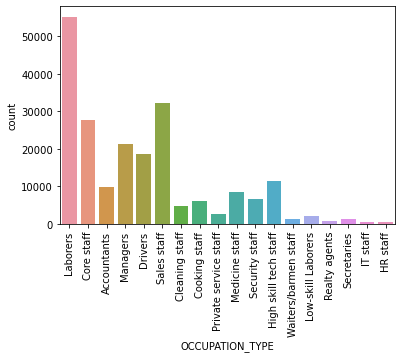

In [23]:
sns.countplot(ad0.OCCUPATION_TYPE)    
plt.xticks(rotation=90);
(ad0.OCCUPATION_TYPE.value_counts(normalize=True)*100).head(10)

## Before filling the missing values dividing the DataFrame into 2 segments 

In [24]:
ad0.TARGET.value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

In [25]:
ad0_0=ad0[ad0.TARGET==0]

In [26]:
ad0_1=ad0[ad0.TARGET==1]

In [27]:
ad0_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


###  Naming of a DF
- Here ad0_0 - Not having payment difficulty
- Here ad0_1 - Having payment difficulty


In [28]:
(ad0_0.isnull().sum()/ad0_0.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004245
AMT_GOODS_PRICE                 0.090914
NAME_TYPE_SUITE                 0.432282
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [29]:
(ad0_1.isnull().sum()/ad0_1.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.084592
NAME_TYPE_SUITE                 0.281974
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

<AxesSubplot:xlabel='AMT_ANNUITY'>

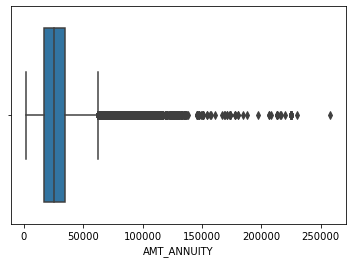

In [30]:
sns.boxplot(ad0_0.AMT_ANNUITY)

<AxesSubplot:xlabel='AMT_ANNUITY'>

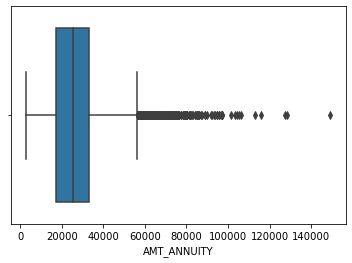

In [31]:
sns.boxplot(ad0_1.AMT_ANNUITY)


In [32]:
ad0_1.AMT_ANNUITY=ad0_1.AMT_ANNUITY.fillna(ad0_1.AMT_ANNUITY.median())
ad0_0.AMT_ANNUITY=ad0_0.AMT_ANNUITY.fillna(ad0_0.AMT_ANNUITY.median())

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

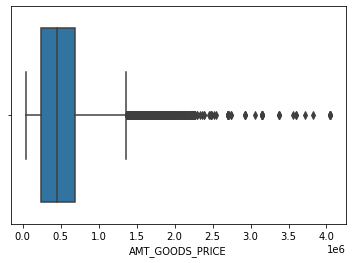

In [33]:
sns.boxplot(ad0_0.AMT_GOODS_PRICE)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

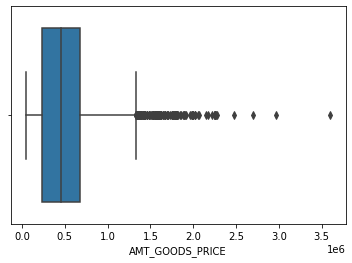

In [34]:
sns.boxplot(ad0_1.AMT_GOODS_PRICE)

In [35]:
ad0_1.AMT_GOODS_PRICE=ad0_1.AMT_GOODS_PRICE.fillna(ad0_1.AMT_GOODS_PRICE.median())
ad0_0.AMT_GOODS_PRICE=ad0_0.AMT_GOODS_PRICE.fillna(ad0_0.AMT_GOODS_PRICE.median())

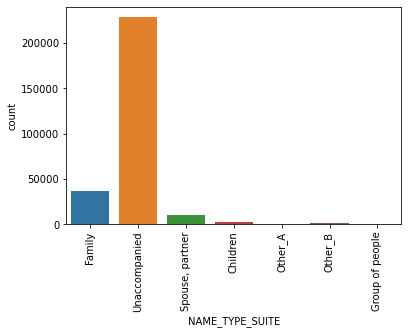

In [36]:
sns.countplot(ad0_0.NAME_TYPE_SUITE)
plt.xticks(rotation=90);

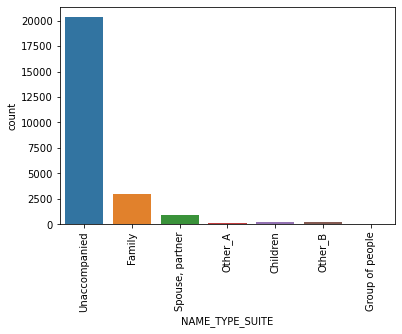

In [37]:
sns.countplot(ad0_1.NAME_TYPE_SUITE)
plt.xticks(rotation=90);

### As more then 80% people are Unaccompanied
    - Therefore we assume that the missing value will also be Unaccompanied

In [38]:
ad0_1.NAME_TYPE_SUITE=ad0_1.NAME_TYPE_SUITE.fillna('Unaccompanied')
ad0_0.NAME_TYPE_SUITE=ad0_0.NAME_TYPE_SUITE.fillna('Unaccompanied')
ad0.NAME_TYPE_SUITE=ad0.NAME_TYPE_SUITE.fillna('Unaccompanied')

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Count'>

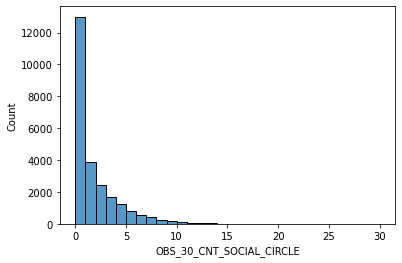

In [39]:
sns.histplot(ad0_1.OBS_30_CNT_SOCIAL_CIRCLE,bins=30)

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Count'>

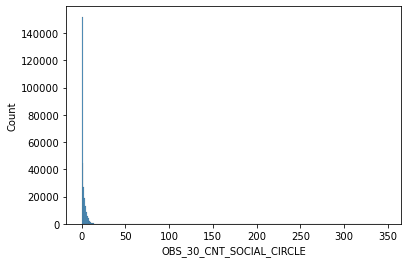

In [40]:
sns.histplot(ad0_0.OBS_30_CNT_SOCIAL_CIRCLE,bins=350)

In [41]:
ad0_0.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    282686.000000
mean          0.138663
std           0.439078
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [42]:
ad0_1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    24825.000000
mean         0.191702
std          0.516201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [43]:
ad0_0.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    282686.000000
mean          0.005540
std           0.078079
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [44]:
ad0_0.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    282686.000000
mean          0.006003
std           0.103545
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [45]:
ad0_0.CNT_FAM_MEMBERS.median()

2.0

In [46]:
ad0_1.CNT_FAM_MEMBERS=ad0_1.CNT_FAM_MEMBERS.fillna(ad0_1.CNT_FAM_MEMBERS.median())
ad0_0.CNT_FAM_MEMBERS=ad0_0.CNT_FAM_MEMBERS.fillna(ad0_0.CNT_FAM_MEMBERS.median())

In [47]:
ad0_1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [48]:
ad0_0.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 25.625607
Sales staff              15.064417
Core staff               13.414134
Managers                 10.408001
Drivers                   8.566102
High skill tech staff     5.545430
Accountants               4.849590
Medicine staff            4.136094
Security staff            3.115182
Cooking staff             2.765185
Cleaning staff            2.184107
Private service staff     1.286265
Low-skill Laborers        0.900438
Secretaries               0.629891
Waiters/barmen staff      0.621063
Realty agents             0.359344
HR staff                  0.273662
IT staff                  0.255488
Name: OCCUPATION_TYPE, dtype: float64

   ## Keeping OCCUPATION_TYPE as NaN value as it will impact the analysis as it will play a direct role in finding potential customers 
       Therefore I am keeping them as others as it will give some insights and won't hamper my data

In [49]:
ad0_1.OCCUPATION_TYPE=np.where(ad0_1.OCCUPATION_TYPE.isnull(),'others',ad0_1.OCCUPATION_TYPE)
ad0_0.OCCUPATION_TYPE=np.where(ad0_0.OCCUPATION_TYPE.isnull(),'others',ad0_0.OCCUPATION_TYPE)
         

### Working on OutLiers

In [50]:
def outlier(col,df):
    q1=df[col].describe().reset_index().iloc[4][col]
    q3=df[col].describe().reset_index().iloc[6][col]
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q3-1.5*iqr
    df[col]=np.where(df[col]>upper_limit,upper_limit,df[col])
    df[col]=np.where(df[col]<lower_limit,lower_limit,df[col])

In [51]:
outlier('AMT_ANNUITY',ad0_0)
outlier('AMT_ANNUITY',ad0_1)

In [52]:
outlier('AMT_GOODS_PRICE',ad0_0)
outlier('AMT_GOODS_PRICE',ad0_1)

In [53]:
ad0_0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282686.000000,2.826860e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,26877.949761,5.323063e+05,0.021021,-16138.176397,65696.146123,-5029.941065,-3017.219788,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150152,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.224090,0.175856,1.410809,0.138663,1.394049,0.096351,-976.384840,0.005540,0.006003,0.029796,0.235049,0.230917,1.640410
std,102825.776954,0.0,0.718843,1.104763e+05,4.068459e+05,13371.052423,3.417550e+05,0.013978,4364.200856,142877.810161,3538.464478,1506.614090,0.001881,0.388579,0.396963,0.043219,0.451051,0.231538,0.906981,0.508422,0.501971,3.263173,0.121323,0.218599,0.197114,0.262812,0.416982,0.380698,2.400119,0.439078,2.379069,0.355196,831.211297,0.078079,0.103545,0.191143,0.870311,0.755824,1.850144
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,7310.250000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189103.250000,0.0,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19793.750000,-2813.000000,-7550.000000,-4313.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1586.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278362.500000,0.0,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,-15877.000000,-1235.000000,-4544.000000,-3295.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-776.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367241.500000,0.0,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.850024e+05,0.028663,-12536.000000,-278.000000,-2045.000000,-1755.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,62187.750000,1.354756e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.0

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Count'>

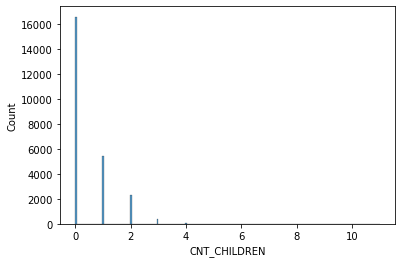

In [54]:
sns.histplot(ad0_1.CNT_CHILDREN)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Count'>

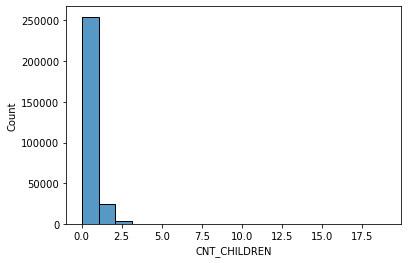

In [55]:
sns.histplot(ad0_0.CNT_CHILDREN,bins =18)

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

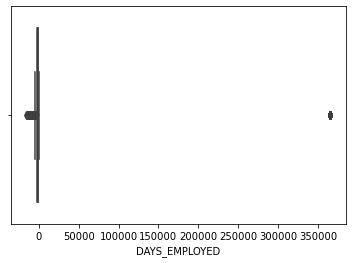

In [56]:
sns.boxplot(ad0_1.DAYS_EMPLOYED)

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

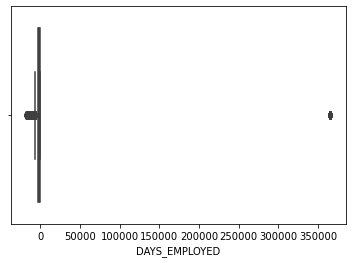

In [57]:
sns.boxplot(ad0_0.DAYS_EMPLOYED)

In [58]:
ad0_0.DAYS_EMPLOYED.describe()

count    282686.000000
mean      65696.146123
std      142877.810161
min      -17912.000000
25%       -2813.000000
50%       -1235.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

## Working on the negative values as time can not be negative

In [59]:
ad0_0.DAYS_EMPLOYED=abs(ad0_0['DAYS_EMPLOYED'])
ad0_1.DAYS_EMPLOYED=abs(ad0_1['DAYS_EMPLOYED'])

In [60]:
ad0_0.DAYS_ID_PUBLISH=abs(ad0_0['DAYS_ID_PUBLISH'])
ad0_1.DAYS_ID_PUBLISH=abs(ad0_1['DAYS_ID_PUBLISH'])

In [61]:
ad0_0.DAYS_LAST_PHONE_CHANGE=abs(ad0_0['DAYS_LAST_PHONE_CHANGE'])
ad0_1.DAYS_LAST_PHONE_CHANGE=abs(ad0_1['DAYS_LAST_PHONE_CHANGE'])

In [62]:
ad0_0.DAYS_EMPLOYED.describe()

count    282686.000000
mean      69668.812255
std      140983.356991
min           0.000000
25%         967.000000
50%        2304.000000
75%        6074.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

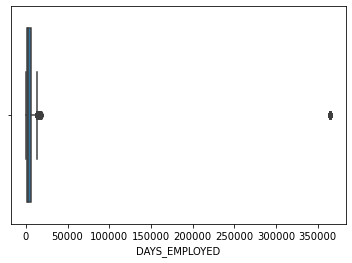

In [63]:
sns.boxplot(ad0_0.DAYS_EMPLOYED)

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

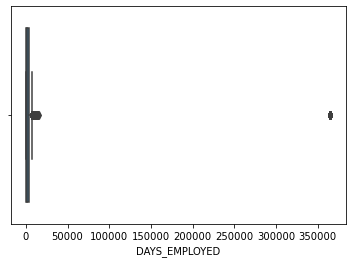

In [64]:
sns.boxplot(ad0_1.DAYS_EMPLOYED)

In [65]:
ad0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [66]:
(ad0_0.OCCUPATION_TYPE.value_counts(normalize=True)*100).head(10)

others                   31.877419
Laborers                 17.456825
Sales staff              10.262270
Core staff                9.138054
Managers                  7.090199
Drivers                   5.835450
High skill tech staff     3.777690
Accountants               3.303666
Medicine staff            2.817614
Security staff            2.122143
Name: OCCUPATION_TYPE, dtype: float64

In [67]:
(ad0_1.OCCUPATION_TYPE.value_counts(normalize=True)*100)

others                   25.289023
Laborers                 23.516616
Sales staff              12.455186
Drivers                   8.487412
Core staff                7.001007
Managers                  5.349446
Security staff            2.908359
High skill tech staff     2.823766
Cooking staff             2.501511
Medicine staff            2.304129
Accountants               1.909366
Cleaning staff            1.800604
Low-skill Laborers        1.446123
Private service staff     0.704935
Waiters/barmen staff      0.612286
Secretaries               0.370594
Realty agents             0.237664
HR staff                  0.145015
IT staff                  0.136959
Name: OCCUPATION_TYPE, dtype: float64

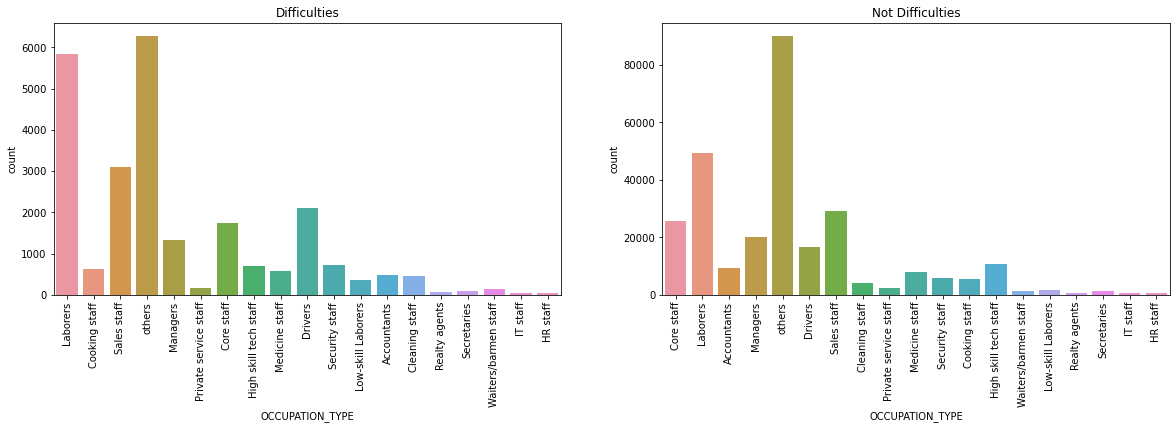

In [68]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.OCCUPATION_TYPE)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.OCCUPATION_TYPE)  
plt.xticks(rotation=90)
plt.show()

## Conclusion 1:
        - Labours takes mostly loans

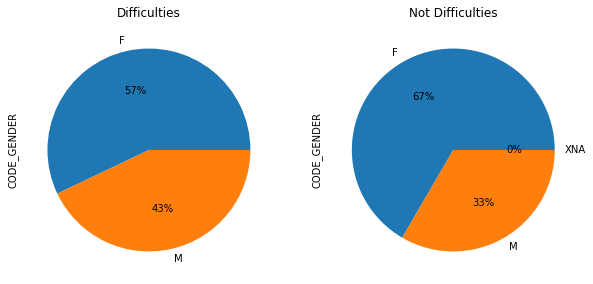

In [69]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
ad0_1.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%") 
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
ad0_0.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%") 
plt.show()



    We can see that female have less difficulty as compare to men


## Nothing usefull Data


In [70]:
ad0_1.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

In [71]:
ad0_0.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

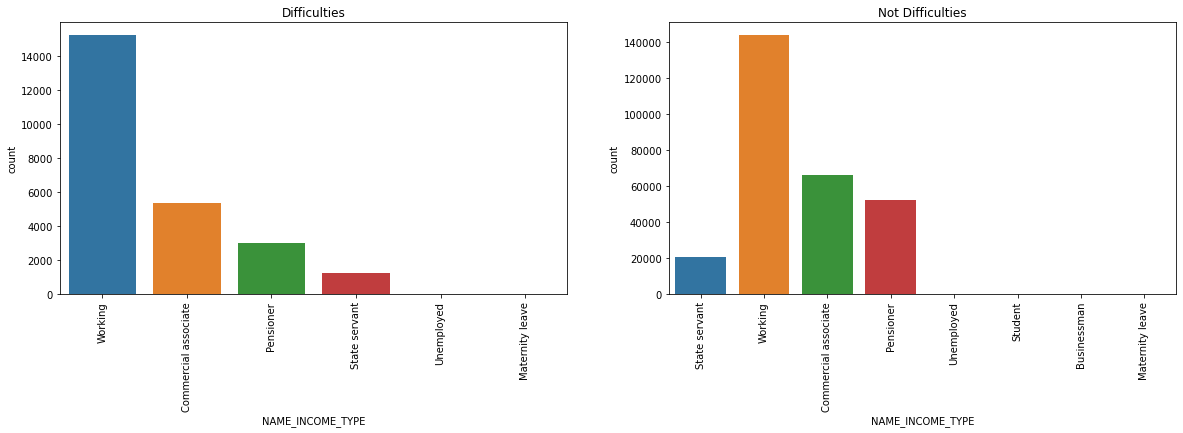

In [72]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.NAME_INCOME_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.NAME_INCOME_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.show()

## We came to few conclusions 
    1 Businessman does not have any issue with payment but have less data to be certain
    2 Pensioner have less difficulties
    3 Workers propulation have much difficulty in payment but no says that are the ones who require most number of times loans

In [73]:
ad0_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

In [74]:
ad0_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

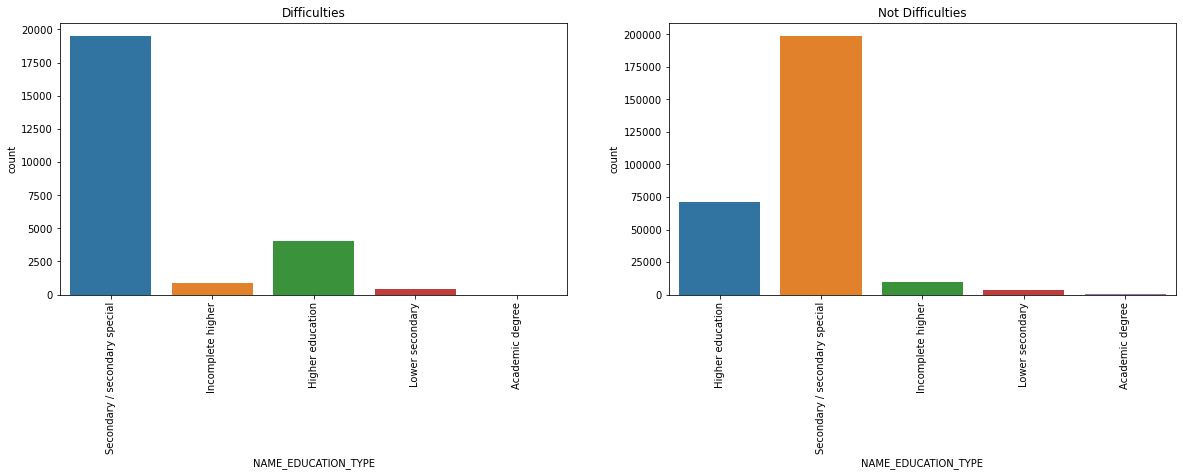

In [75]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.NAME_EDUCATION_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.NAME_EDUCATION_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.show()

    Higher education are less difficulty where as Secondary / secondary special have little more difficulty

In [76]:
ad0_1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

In [77]:
ad0_0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

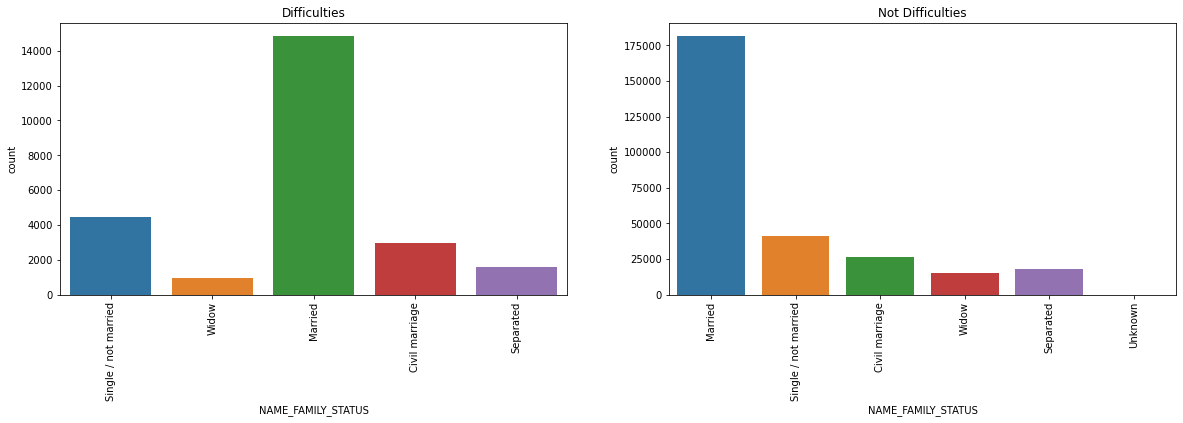

In [78]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.NAME_FAMILY_STATUS,hue_order=True)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.NAME_FAMILY_STATUS,hue_order=True)  
plt.xticks(rotation=90)
plt.show()

      Married people have less difficulty 
      Single have little more difficulty

In [79]:
ad0_1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64

In [80]:
ad0_0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64

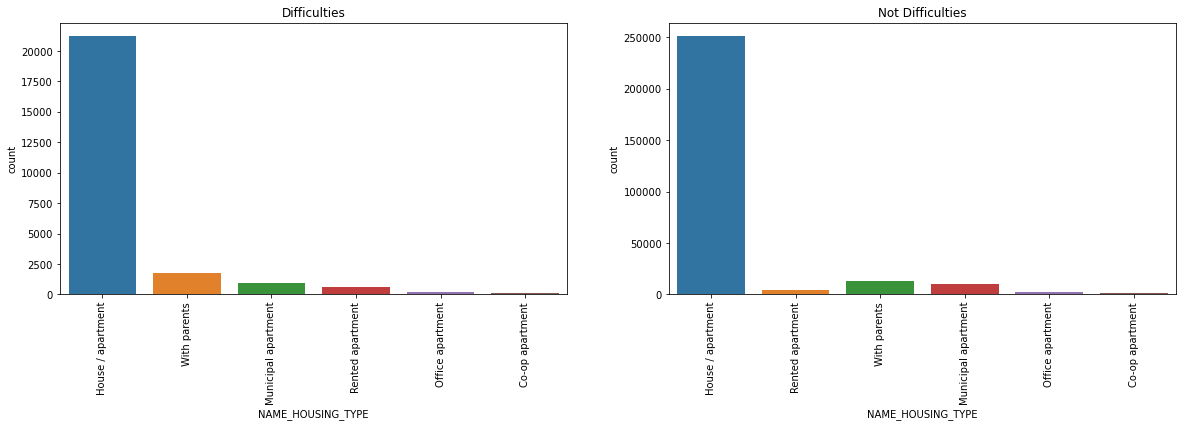

In [81]:

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.NAME_HOUSING_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.NAME_HOUSING_TYPE,hue_order=True)  
plt.xticks(rotation=90)
plt.show()

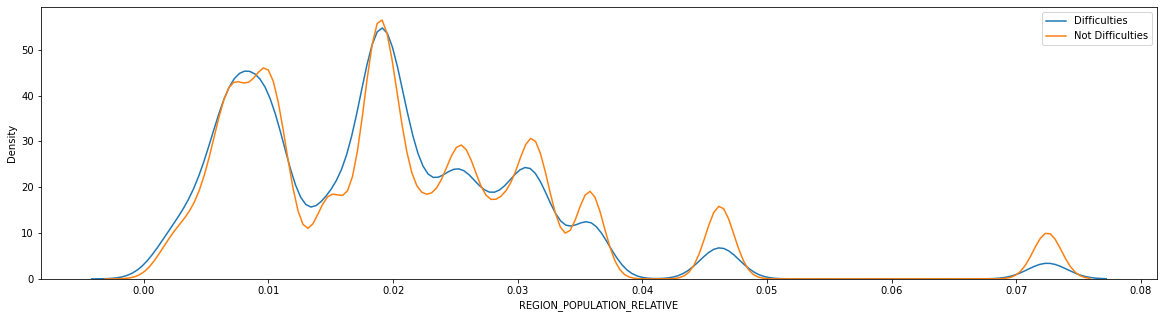

In [82]:
plt.figure(figsize=(20,5))

sns.distplot(ad0_1.REGION_POPULATION_RELATIVE,label='Difficulties',hist=False)
sns.distplot(ad0_0.REGION_POPULATION_RELATIVE,label='Not Difficulties',hist=False)
plt.legend()
plt.show()

    We can see that if the population is higher then they are less likely to delay the payment

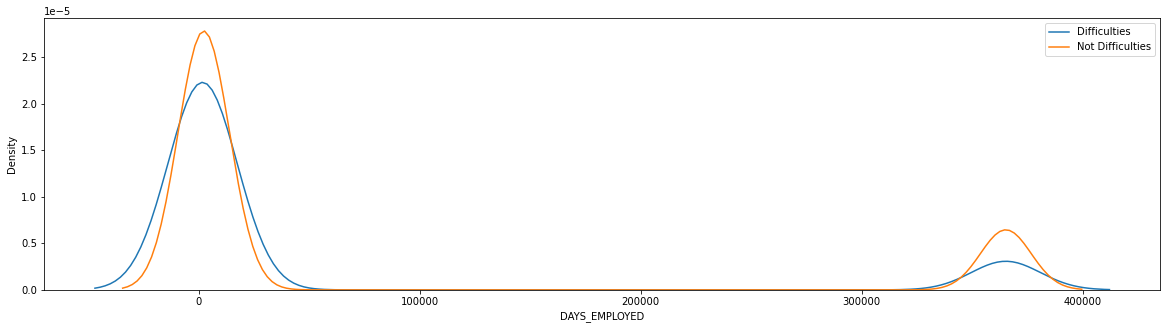

In [83]:

plt.figure(figsize=(20,5))


sns.distplot(ad0_1.DAYS_EMPLOYED,label='Difficulties',hist=False)
sns.distplot(ad0_0.DAYS_EMPLOYED,label='Not Difficulties',hist=False)
plt.legend()
plt.show()

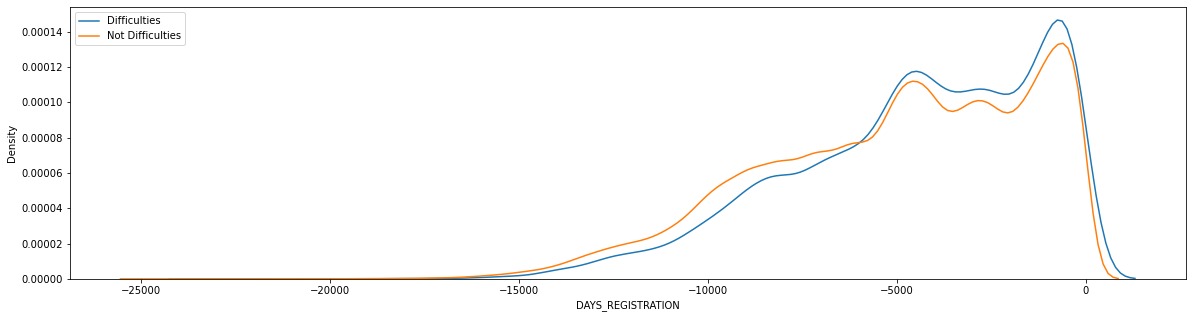

In [84]:

plt.figure(figsize=(20,5))


sns.distplot(ad0_1.DAYS_REGISTRATION,label='Difficulties',hist=False)
sns.distplot(ad0_0.DAYS_REGISTRATION,label='Not Difficulties',hist=False)
plt.legend()
plt.show()

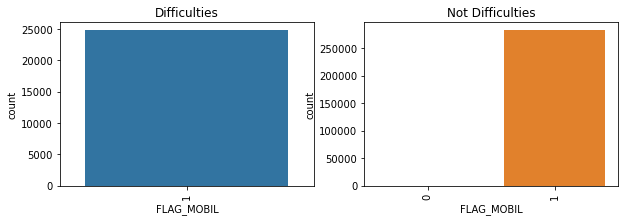

In [85]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.FLAG_MOBIL)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.FLAG_MOBIL)  
plt.xticks(rotation=90)
plt.show()

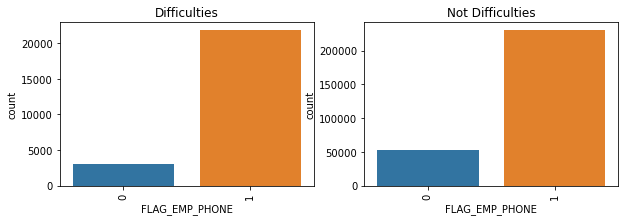

In [86]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.FLAG_EMP_PHONE)  
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.FLAG_EMP_PHONE)  
plt.xticks(rotation=90)
plt.show()

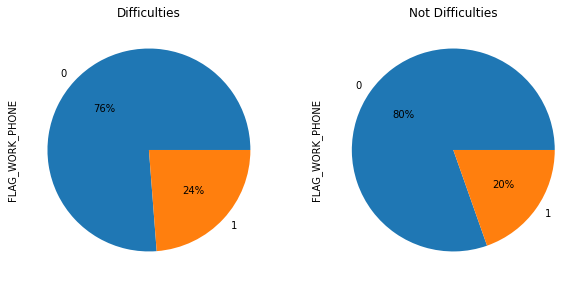

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
ad0_1.FLAG_WORK_PHONE.value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(1,2,2)
plt.title('Not Difficulties')
ad0_0.FLAG_WORK_PHONE.value_counts().plot.pie(autopct = "%1.0f%%") 
plt.show()


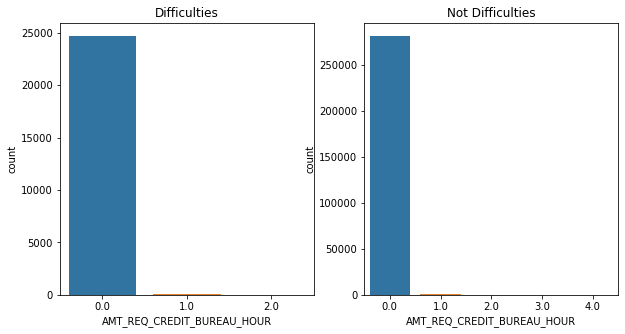

In [88]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.AMT_REQ_CREDIT_BUREAU_HOUR)  
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.AMT_REQ_CREDIT_BUREAU_HOUR)  

plt.show()

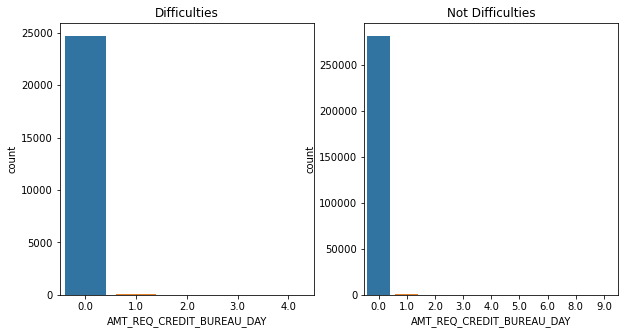

In [89]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.AMT_REQ_CREDIT_BUREAU_DAY)  
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.AMT_REQ_CREDIT_BUREAU_DAY)  
plt.show()

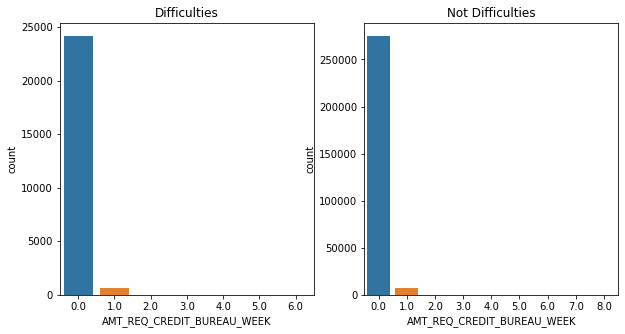

In [90]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot(ad0_1.AMT_REQ_CREDIT_BUREAU_WEEK)  
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot(ad0_0.AMT_REQ_CREDIT_BUREAU_WEEK)  
plt.show()

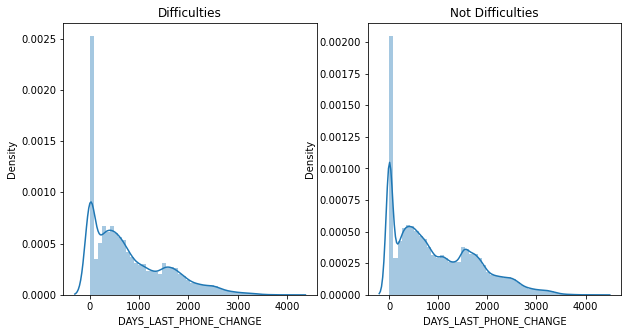

In [91]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.distplot(ad0_1.DAYS_LAST_PHONE_CHANGE)  
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.distplot(ad0_0.DAYS_LAST_PHONE_CHANGE)  
plt.show()

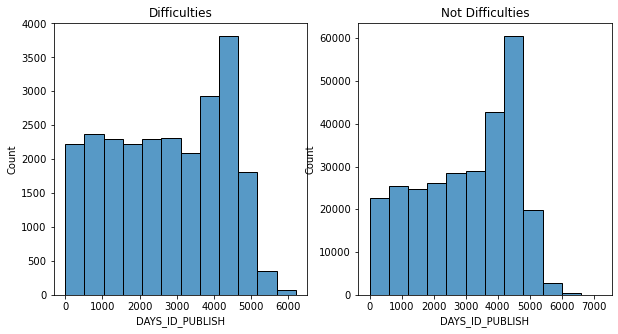

In [92]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.histplot(ad0_1.DAYS_ID_PUBLISH,bins=12)  
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.histplot(ad0_0.DAYS_ID_PUBLISH,bins=12)  

plt.show()

# Doing Bivariant Analysis

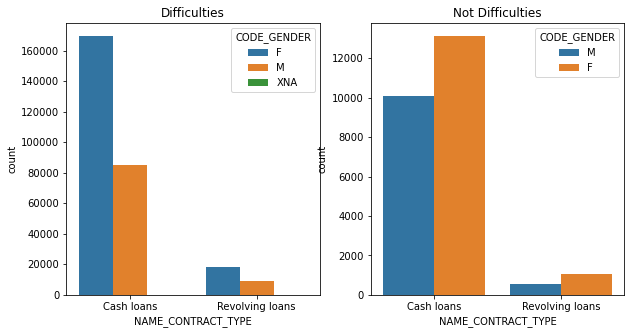

In [93]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=ad0_0)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=ad0_1)  
plt.show()

    We can see that Cash loans are in much more demant then revolving loans

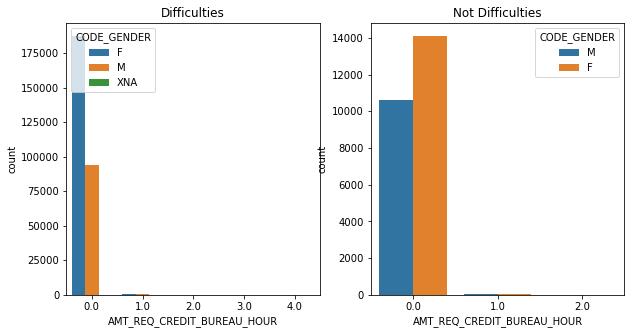

In [94]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot("AMT_REQ_CREDIT_BUREAU_HOUR",hue="CODE_GENDER",data=ad0_0)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot("AMT_REQ_CREDIT_BUREAU_HOUR",hue="CODE_GENDER",data=ad0_1)  
plt.show()

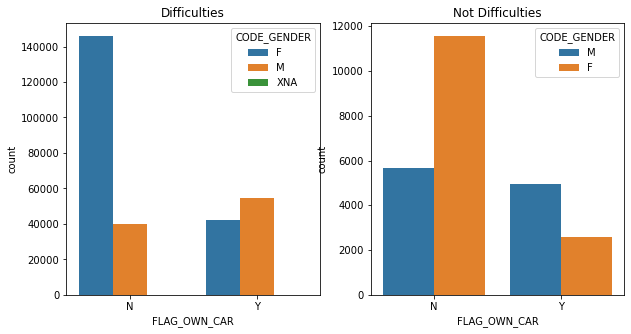

In [95]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot("FLAG_OWN_CAR",hue="CODE_GENDER",data=ad0_0)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot("FLAG_OWN_CAR",hue="CODE_GENDER",data=ad0_1)  
plt.show()

    We can clearly see the difference in number but lets see in % terms to help our outcome

			For People who are having Difficulties


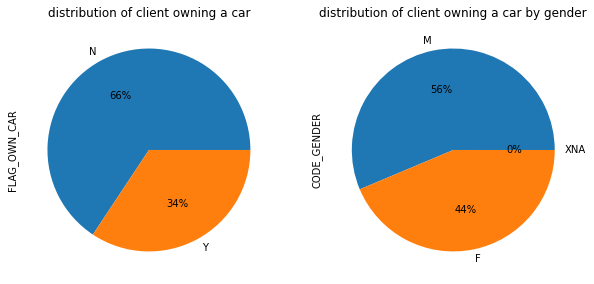

In [96]:
plt.figure(figsize=(10,5))
print("\t\t\tFor People who are having Difficulties")

plt.subplot(121)
ad0_0["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car")

plt.subplot(122)
ad0_0[ad0_0["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("distribution of client owning a car by gender")

plt.show()

			For People who are not having Difficulties


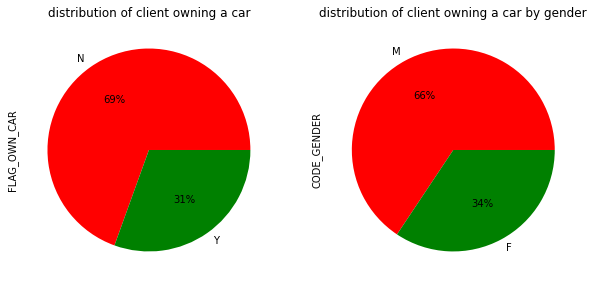

In [97]:
plt.figure(figsize=(10,5))
print("\t\t\tFor People who are not having Difficulties")

plt.subplot(121)
ad0_1["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","green"])
plt.title("distribution of client owning a car")

plt.subplot(122)
ad0_1[ad0_1["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","green"])
plt.title("distribution of client owning a car by gender")

plt.show()

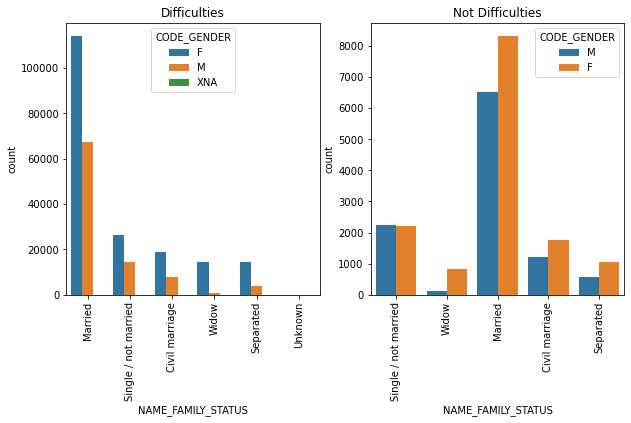

In [98]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Difficulties')
sns.countplot("NAME_FAMILY_STATUS",hue="CODE_GENDER",data=ad0_0)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Not Difficulties')
sns.countplot("NAME_FAMILY_STATUS",hue="CODE_GENDER",data=ad0_1)  
plt.xticks(rotation=90)
plt.show()

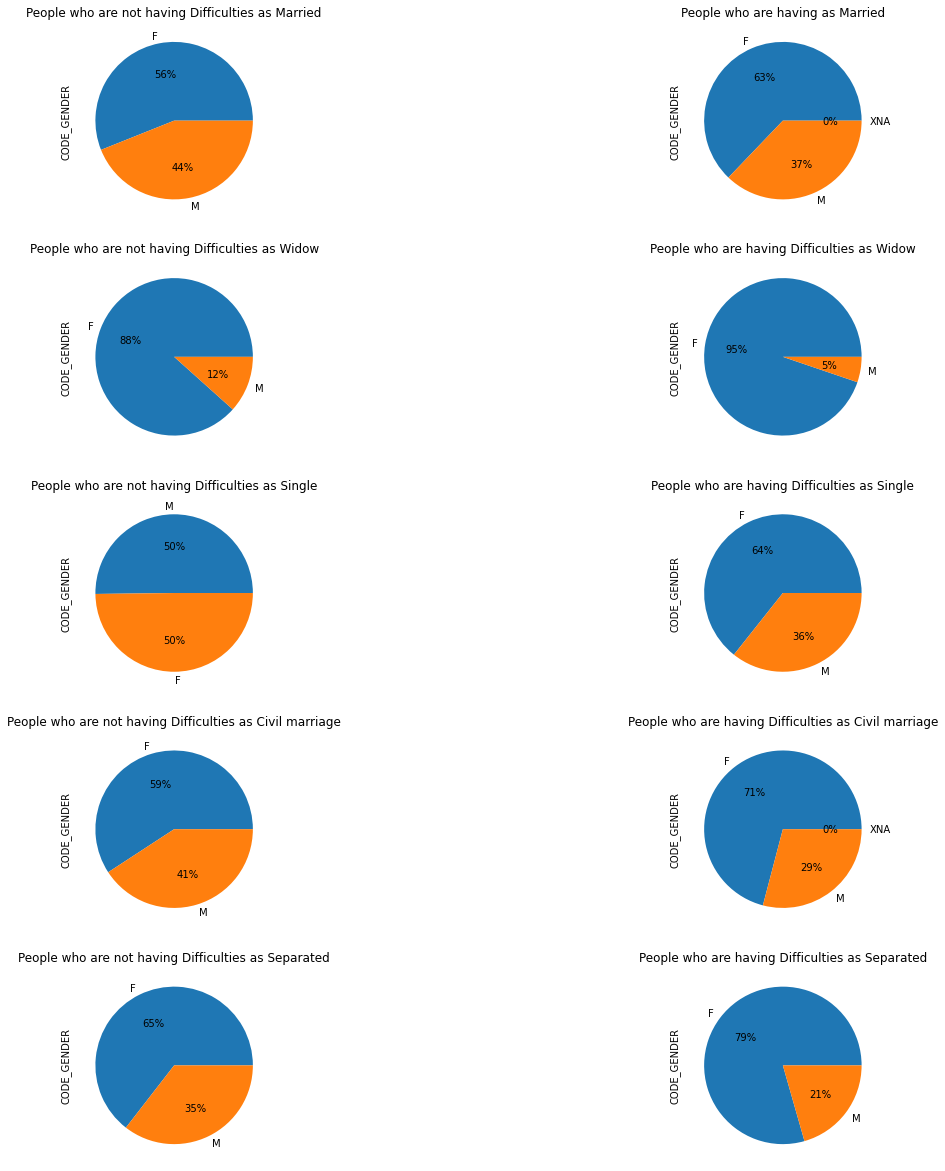

In [99]:
plt.figure(figsize=(20,21))

plt.subplot(521)
ad0_1[ad0_1["NAME_FAMILY_STATUS"]=='Married']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are not having Difficulties as Married")

plt.subplot(522)
ad0_0[ad0_0["NAME_FAMILY_STATUS"]=='Married']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are having as Married")

plt.subplot(523)
ad0_1[ad0_1["NAME_FAMILY_STATUS"]=='Widow']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are not having Difficulties as Widow")

plt.subplot(524)
ad0_0[ad0_0["NAME_FAMILY_STATUS"]=='Widow']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are having Difficulties as Widow")


plt.subplot(525)
ad0_1[ad0_1["NAME_FAMILY_STATUS"]=='Single / not married']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are not having Difficulties as Single")

plt.subplot(526)
ad0_0[ad0_0["NAME_FAMILY_STATUS"]=='Single / not married']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are having Difficulties as Single")


plt.subplot(527)
ad0_1[ad0_1["NAME_FAMILY_STATUS"]=='Civil marriage']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are not having Difficulties as Civil marriage")

plt.subplot(528)
ad0_0[ad0_0["NAME_FAMILY_STATUS"]=='Civil marriage']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are having Difficulties as Civil marriage")

plt.subplot(529)
ad0_1[ad0_1["NAME_FAMILY_STATUS"]=='Separated']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are not having Difficulties as Separated")

plt.subplot(5,2,10)
ad0_0[ad0_0["NAME_FAMILY_STATUS"]=='Separated']["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("People who are having Difficulties as Separated")

plt.show()

## Merging both the DataFrame  ad0_0 and ad0_1 to ad1

In [100]:
ad1=ad0_0.merge(ad0_1,how='outer',sort=True)

In [101]:
ad1.shape

(307511, 51)

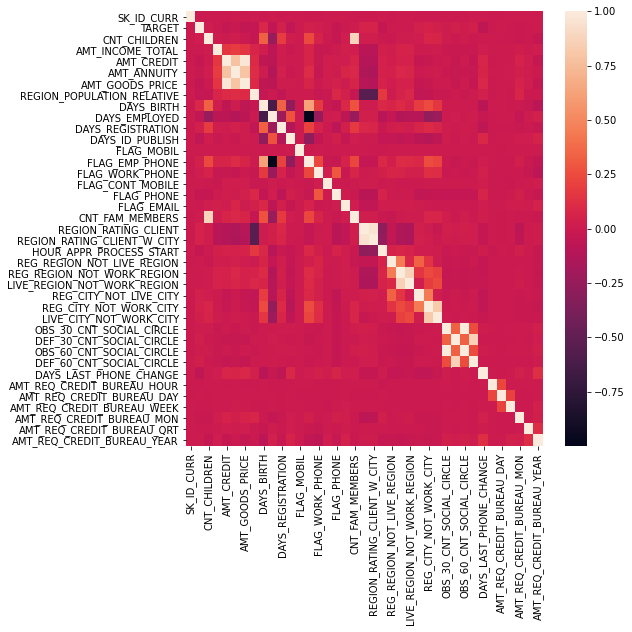

In [102]:
corrt = ad1.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrt, ax = ax) 
plt.show()

In [103]:
corrmat = ad1.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
1198,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
516,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
238,AMT_GOODS_PRICE,AMT_CREDIT,0.97
799,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
704,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
959,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1238,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1079,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
199,AMT_ANNUITY,AMT_CREDIT,0.79
239,AMT_GOODS_PRICE,AMT_ANNUITY,0.79


# Working on Previous Application DF

In [104]:
pa0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [105]:
(pa0.isnull().sum()/pa0.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Droping Col


In [106]:
pa0.drop(pa0[['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED']],inplace=True,axis=1)

In [107]:
pa0.shape

(1670214, 35)

Working on Mssing Values 

In [108]:
((pa0.isnull().sum()/pa0.shape[0]).sort_values(ascending=False)*100).head(13)

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
dtype: float64

In [109]:
pa0.AMT_DOWN_PAYMENT.describe()

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

In [110]:
std=pa0.AMT_DOWN_PAYMENT.std()
pa0.AMT_DOWN_PAYMENT.fillna(value=std,inplace=True)

<AxesSubplot:xlabel='AMT_DOWN_PAYMENT'>

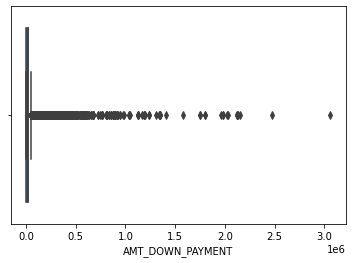

In [111]:
sns.boxplot(pa0.AMT_DOWN_PAYMENT)

In [112]:
pa0.RATE_DOWN_PAYMENT.describe()

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [113]:
pa0.RATE_DOWN_PAYMENT=abs(pa0['RATE_DOWN_PAYMENT'])

In [114]:
median=pa0.RATE_DOWN_PAYMENT.median()
pa0.RATE_DOWN_PAYMENT.fillna(value=median,inplace=True)

<AxesSubplot:xlabel='RATE_DOWN_PAYMENT'>

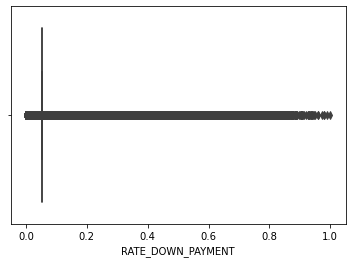

In [115]:
sns.boxplot(pa0.RATE_DOWN_PAYMENT)

In [116]:
pa0.NAME_TYPE_SUITE.value_counts()          

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [117]:
pa0.NAME_TYPE_SUITE.isnull().sum()

820405

In [118]:
pa0.NAME_TYPE_SUITE=pa0.NAME_TYPE_SUITE.fillna('Unaccompanied')

##### As NAN value doesn't make sence if no one accompanied then they hould come under Unaccompanied 

Unaccompanied      79.593094
Family             12.768603
Spouse, partner     4.015593
Children            1.889937
Other_B             1.055194
Other_A             0.543463
Group of people     0.134115
Name: NAME_TYPE_SUITE, dtype: float64

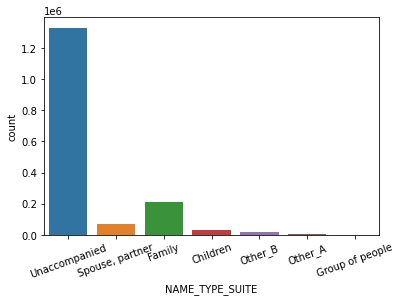

In [119]:
sns.countplot(pa0.NAME_TYPE_SUITE)
plt.xticks(rotation=20)
pa0.NAME_TYPE_SUITE.value_counts(normalize=True)*100

In [120]:
pa0.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True)*100          

0.0    66.742984
1.0    33.257016
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [121]:
pa0.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

673065

In [122]:
pa0.NFLAG_INSURED_ON_APPROVAL=pa0.NFLAG_INSURED_ON_APPROVAL.fillna(0)

In [123]:
pa0.DAYS_LAST_DUE.value_counts(normalize=True)*100    

 365243.0    21.182491
-245.0        0.065988
-188.0        0.065186
-239.0        0.064384
-167.0        0.063982
               ...    
-2836.0       0.000100
-2834.0       0.000100
-2862.0       0.000100
-2881.0       0.000100
-2861.0       0.000100
Name: DAYS_LAST_DUE, Length: 2873, dtype: float64

In [124]:
pa0.DAYS_LAST_DUE=abs(pa0['DAYS_LAST_DUE'])

<AxesSubplot:xlabel='DAYS_LAST_DUE'>

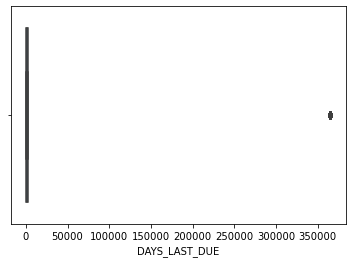

In [125]:
sns.boxplot(pa0.DAYS_LAST_DUE)

In [126]:
std=pa0.DAYS_LAST_DUE.std()
pa0.DAYS_LAST_DUE.fillna(value=std,inplace=True)

In [127]:
pa0.DAYS_LAST_DUE.describe()

count    1.670214e+06
mean     1.066357e+05
std      1.201111e+05
min      2.000000e+00
25%      8.730000e+02
50%      1.488333e+05
75%      1.488333e+05
max      3.652430e+05
Name: DAYS_LAST_DUE, dtype: float64

In [128]:
pa0.DAYS_FIRST_DRAWING.value_counts(normalize=True)*100    

 365243.0    93.711572
-228.0        0.012335
-212.0        0.012135
-224.0        0.012135
-223.0        0.011934
               ...    
-1544.0       0.000100
-1887.0       0.000100
-1579.0       0.000100
-1733.0       0.000100
-1895.0       0.000100
Name: DAYS_FIRST_DRAWING, Length: 2838, dtype: float64

In [129]:
pa0.DAYS_FIRST_DRAWING=abs(pa0['DAYS_FIRST_DRAWING'])

<AxesSubplot:xlabel='DAYS_FIRST_DRAWING'>

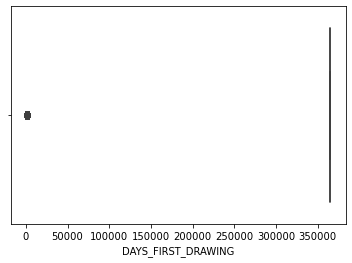

In [130]:
sns.boxplot(pa0.DAYS_FIRST_DRAWING)

In [131]:
std=pa0.DAYS_FIRST_DRAWING.std()
pa0.DAYS_FIRST_DRAWING.fillna(value=std,inplace=True)

In [132]:
pa0.DAYS_TERMINATION.value_counts(normalize=True)*100        
pa0.DAYS_TERMINATION=abs(pa0['DAYS_TERMINATION'])

<AxesSubplot:xlabel='DAYS_FIRST_DRAWING'>

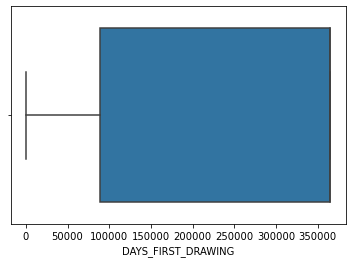

In [133]:
sns.boxplot(pa0.DAYS_FIRST_DRAWING)

In [134]:
std=pa0.DAYS_TERMINATION.std()
pa0.DAYS_TERMINATION.fillna(value=std,inplace=True)

In [135]:
pa0.DAYS_LAST_DUE_1ST_VERSION.value_counts(normalize=True)*100        
pa0.DAYS_LAST_DUE_1ST_VERSION=abs(pa0['DAYS_LAST_DUE_1ST_VERSION'])

In [136]:
std=pa0.DAYS_LAST_DUE_1ST_VERSION.std()
pa0.DAYS_LAST_DUE_1ST_VERSION.fillna(value=std,inplace=True)

<AxesSubplot:xlabel='DAYS_LAST_DUE_1ST_VERSION'>

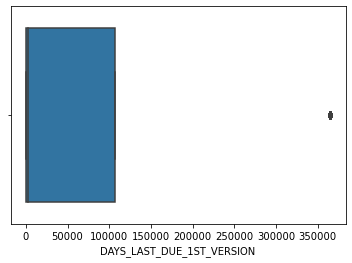

In [137]:
sns.boxplot(pa0.DAYS_LAST_DUE_1ST_VERSION)

In [138]:
pa0.DAYS_TERMINATION.value_counts(normalize=True)*100        
pa0.DAYS_TERMINATION=abs(pa0['DAYS_TERMINATION'])

In [139]:
std=pa0.DAYS_TERMINATION.std()
pa0.DAYS_TERMINATION.fillna(value=std,inplace=True)

<AxesSubplot:xlabel='DAYS_TERMINATION'>

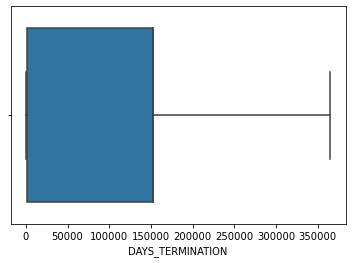

In [140]:
sns.boxplot(pa0.DAYS_TERMINATION)

In [141]:
pa0.DAYS_FIRST_DUE.value_counts(normalize=True)*100        
pa0.DAYS_FIRST_DUE=abs(pa0['DAYS_FIRST_DUE'])

In [142]:
std=pa0.DAYS_FIRST_DUE.std()
pa0.DAYS_FIRST_DUE.fillna(value=std,inplace=True)

<AxesSubplot:xlabel='DAYS_FIRST_DUE'>

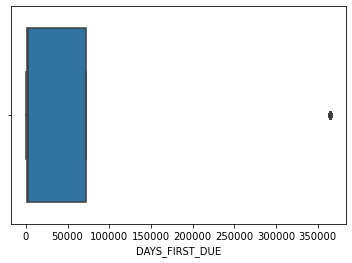

In [143]:
sns.boxplot(pa0.DAYS_FIRST_DUE)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

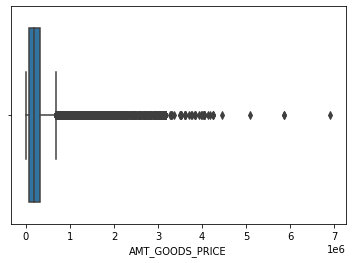

In [144]:
pa0.AMT_GOODS_PRICE.value_counts(normalize=True)*100        
pa0.AMT_GOODS_PRICE=abs(pa0['AMT_GOODS_PRICE'])
std=pa0.AMT_GOODS_PRICE.std()
pa0.AMT_GOODS_PRICE.fillna(value=std,inplace=True)
sns.boxplot(pa0.AMT_GOODS_PRICE)

<AxesSubplot:xlabel='AMT_ANNUITY'>

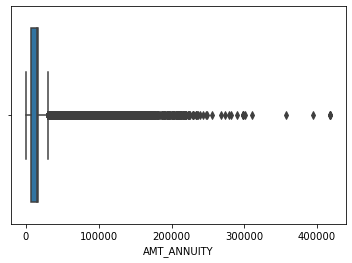

In [145]:
pa0.AMT_ANNUITY.value_counts(normalize=True)*100        
pa0.AMT_ANNUITY=abs(pa0['AMT_ANNUITY'])
mean=pa0.AMT_ANNUITY.mean()
pa0.AMT_ANNUITY.fillna(value=mean,inplace=True)
sns.boxplot(pa0.AMT_ANNUITY)

<AxesSubplot:xlabel='CNT_PAYMENT'>

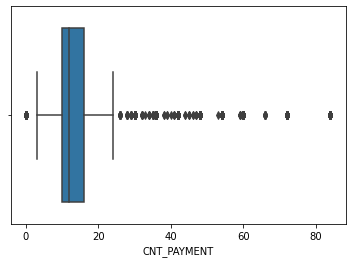

In [146]:
pa0.CNT_PAYMENT.value_counts(normalize=True)*100        
pa0.CNT_PAYMENT=abs(pa0['CNT_PAYMENT'])
mean=pa0.CNT_PAYMENT.mean()
pa0.CNT_PAYMENT.fillna(value=mean,inplace=True)
sns.boxplot(pa0.CNT_PAYMENT)

In [147]:
((pa0.isnull().sum()/pa0.shape[0]).sort_values(ascending=False)*100).head(3)

PRODUCT_COMBINATION    0.020716
AMT_CREDIT             0.000060
SK_ID_PREV             0.000000
dtype: float64

In [148]:
pa0.PRODUCT_COMBINATION.value_counts(normalize=True)*100

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

In [149]:
pa0.PRODUCT_COMBINATION.fillna(value='Other',inplace=True)

<AxesSubplot:xlabel='AMT_CREDIT'>

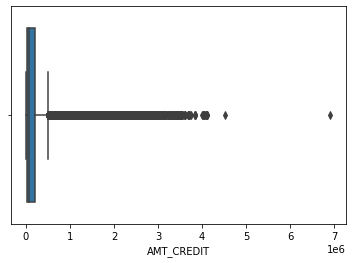

In [150]:
pa0.AMT_CREDIT.value_counts(normalize=True)*100        
mean=pa0.AMT_CREDIT.mean()
pa0.AMT_CREDIT.fillna(value=mean,inplace=True)
sns.boxplot(pa0.AMT_CREDIT)

In [151]:
pa0.AMT_CREDIT.describe()

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

### Working on Catagorical Columns

XAP        55.242083
XNA        40.588691
Repairs     1.422872
Other       0.934491
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

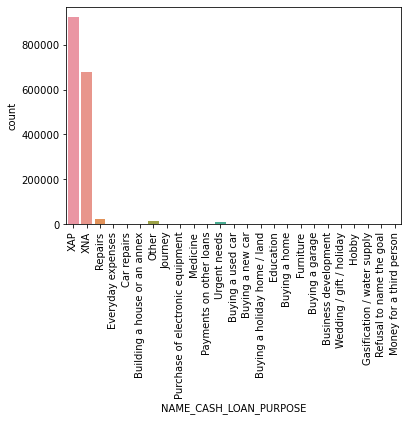

In [152]:
sns.countplot(pa0.NAME_CASH_LOAN_PURPOSE)
plt.xticks(rotation=90)
(pa0.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100).head(4)

#### Almost 95% is for XAP and XAN or can say NaN values

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

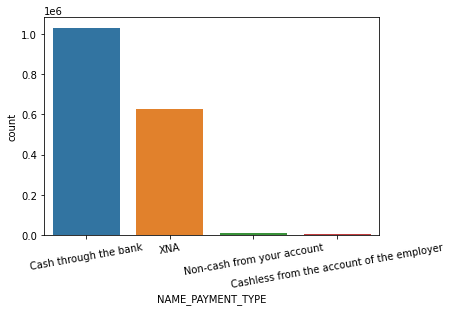

In [153]:
sns.countplot(pa0.NAME_PAYMENT_TYPE)
plt.xticks(rotation=10)
pa0.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

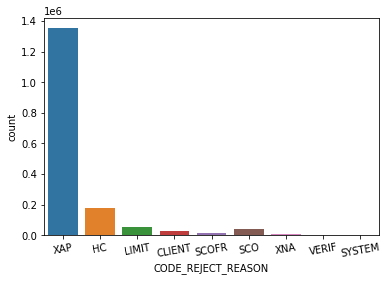

In [154]:
sns.countplot(pa0.CODE_REJECT_REASON)
plt.xticks(rotation=10)
pa0.CODE_REJECT_REASON.value_counts(normalize=True)*100

XNA                     56.927376
Mobile                  13.453845
Consumer Electronics     7.279067
Computers                6.332662
Audio/Video              5.953788
Name: NAME_GOODS_CATEGORY, dtype: float64

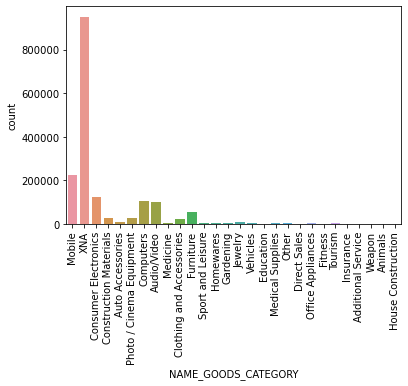

In [155]:
sns.countplot(pa0.NAME_GOODS_CATEGORY)
plt.xticks(rotation=90)
(pa0.NAME_GOODS_CATEGORY.value_counts(normalize=True)*100).head()

Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64

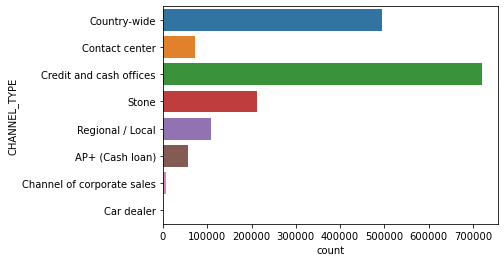

In [156]:
sns.countplot(y=pa0.CHANNEL_TYPE)

pa0.CHANNEL_TYPE.value_counts(normalize=True)*100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Name: NAME_SELLER_INDUSTRY, dtype: float64

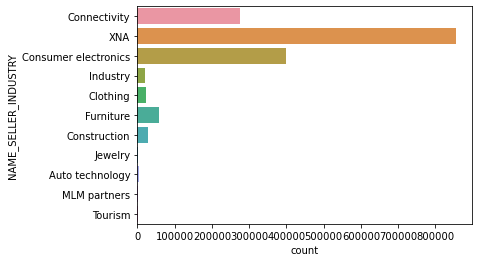

In [157]:
sns.countplot(y=pa0.NAME_SELLER_INDUSTRY)

(pa0.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100).head()

XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

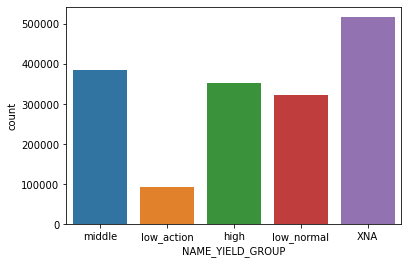

In [158]:
sns.countplot(pa0.NAME_YIELD_GROUP)
pa0.NAME_YIELD_GROUP.value_counts(normalize=True)*100

## Working on Outliers

In [159]:
outlier('AMT_DOWN_PAYMENT',pa0)

In [160]:
outlier('RATE_DOWN_PAYMENT',pa0)
outlier('DAYS_LAST_DUE',pa0)
outlier('DAYS_FIRST_DRAWING',pa0)
outlier('DAYS_FIRST_DUE',pa0)
outlier('AMT_GOODS_PRICE',pa0)
outlier('AMT_ANNUITY',pa0)
outlier('AMT_CREDIT',pa0)
outlier('CNT_PAYMENT',pa0)

#  Analysis

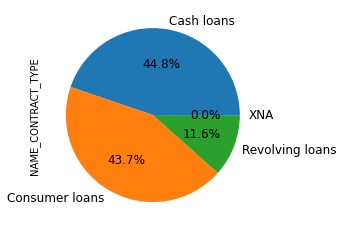

In [161]:
pa0.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12)
plt.show()

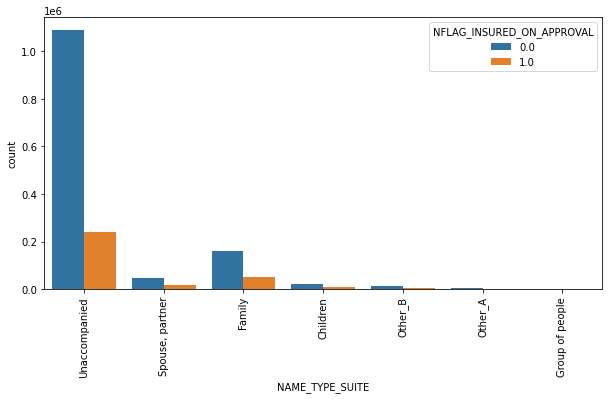

In [162]:
plt.figure(figsize=(10,5))


sns.countplot("NAME_TYPE_SUITE",hue="NFLAG_INSURED_ON_APPROVAL",data=pa0)
plt.xticks(rotation=90)
plt.show();

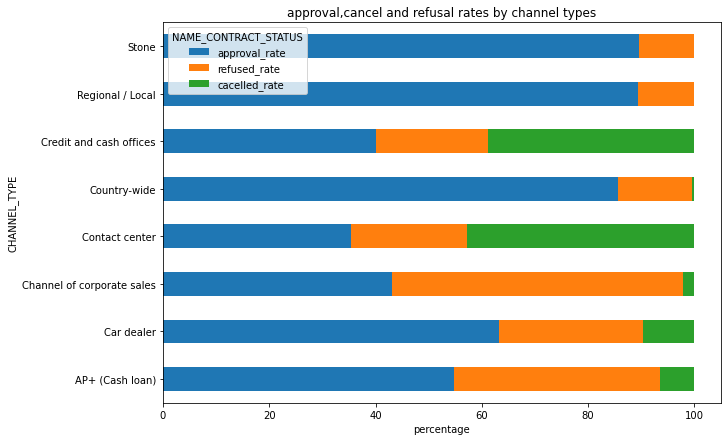

In [163]:
app = pd.crosstab(pa0["CHANNEL_TYPE"],pa0["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

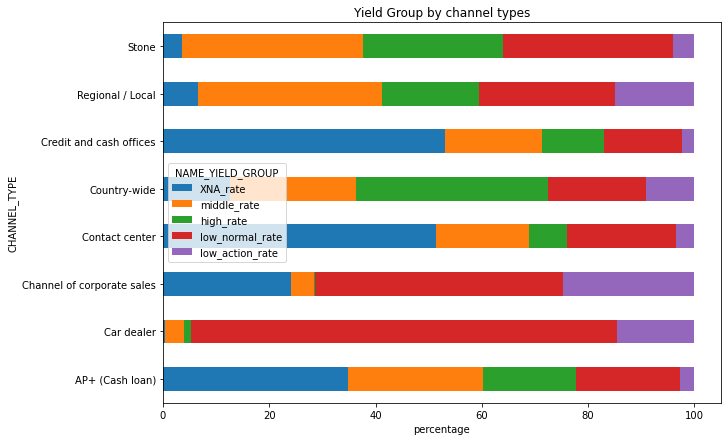

In [164]:
app = pd.crosstab(pa0["CHANNEL_TYPE"],pa0["NAME_YIELD_GROUP"])
app1 = app
app1["XNA_rate"] = app1["XNA"]*100/(app1["XNA"]+app1["middle"]+app1["high"]+app1["low_normal"]+app1["low_action"])
app1["middle_rate"]  = app1["middle"]*100/(app1["XNA"]+app1["middle"]+app1["high"]+app1["low_normal"]+app1["low_action"])
app1["high_rate"] = app1["high"]*100/(app1["XNA"]+app1["middle"]+app1["high"]+app1["low_normal"]+app1["low_action"])
app1["low_normal_rate"]  = app1["low_normal"]*100/(app1["XNA"]+app1["middle"]+app1["high"]+app1["low_normal"]+app1["low_action"])
app1["low_action_rate"] = app1["low_action"]*100/(app1["XNA"]+app1["middle"]+app1["high"]+app1["low_normal"]+app1["low_action"])
app2 = app[["XNA_rate","middle_rate","high_rate","low_normal_rate","low_action_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_xlabel("percentage")
ax.set_title("Yield Group by channel types")
plt.show()

In [165]:
corrmat = pa0.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
339,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
79,AMT_CREDIT,AMT_APPLICATION,0.81
116,AMT_GOODS_PRICE,AMT_ANNUITY,0.81
117,AMT_GOODS_PRICE,AMT_APPLICATION,0.73
78,AMT_CREDIT,AMT_ANNUITY,0.72
118,AMT_GOODS_PRICE,AMT_CREDIT,0.71
59,AMT_APPLICATION,AMT_ANNUITY,0.65
299,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,0.60
234,CNT_PAYMENT,AMT_GOODS_PRICE,0.60
338,DAYS_TERMINATION,DAYS_LAST_DUE_1ST_VERSION,0.54


# Now merge the both dataFrame ad1 and pa0 as Joined

In [166]:
joined=pa0.merge(ad1,on='SK_ID_CURR',how='inner',sort=True)

In [167]:
joined.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1038818,100002,Consumer loans,9251.77500,179055.0,179055.0,0.00000,179055.000000,SATURDAY,9,Y,1,0.051605,XAP,Approved,-606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.50,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,637,-3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1810518,100003,Cash loans,30739.42125,900000.0,504805.5,20921.49541,687241.394842,FRIDAY,12,Y,1,0.051605,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.50,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,1188,-1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2636178,100003,Consumer loans,30739.42125,337500.0,348637.5,0.00000,337500.000000,SUNDAY,17,Y,1,0.051605,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.972959,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.50,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,1188,-1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2396755,100003,Consumer loans,6737.31000,68809.5,68053.5,6885.00000,68809.500000,SATURDAY,15,Y,1,0.051605,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.000000,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.50,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,1188,-1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1564014,100004,Consumer loans,5357.25000,24282.0,20106.0,4860.00000,24282.000000,FRIDAY,5,Y,1,0.051605,XAP,Ap

In [168]:
joined.shape

(1413701, 85)

In [169]:
joined.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')


In [170]:
joined.shape

(291057, 85)

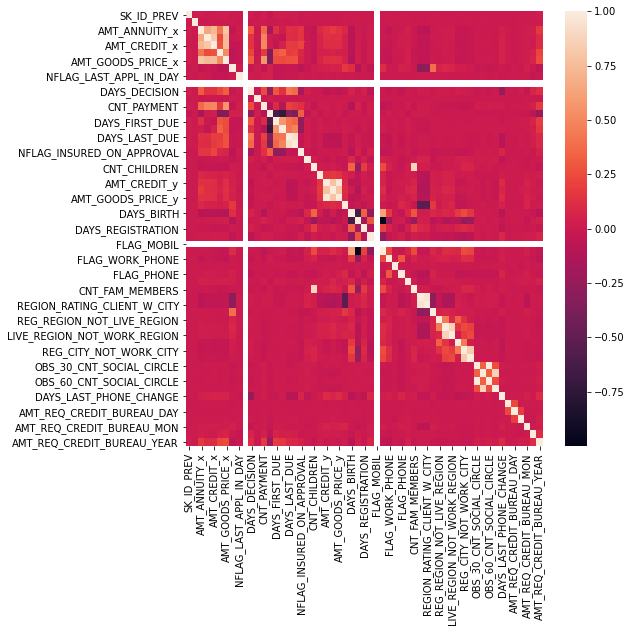

In [171]:
corrt = joined.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrt, ax = ax) 
plt.show()

## Taken help from other to findout the corelation in the variable

In [199]:
corrmat = joined.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2782,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
1794,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1390,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.98
2203,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
985,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
2072,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
2435,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
2840,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
2609,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
231,AMT_CREDIT_x,AMT_APPLICATION,0.81


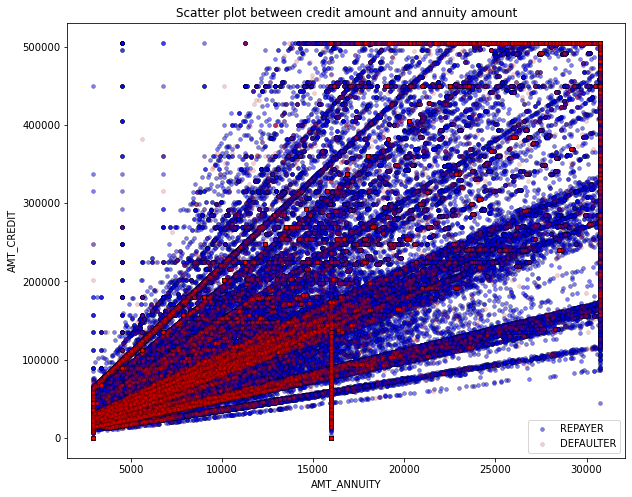

In [175]:
fig = plt.figure(figsize=(10,8))
plt.scatter(joined[joined["TARGET"]==0]['AMT_ANNUITY_x'],joined[joined["TARGET"]==0]['AMT_CREDIT_x'],s=15,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(joined[joined["TARGET"]==1]['AMT_ANNUITY_x'],joined[joined["TARGET"]==1]['AMT_CREDIT_x'],s=15,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":10})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

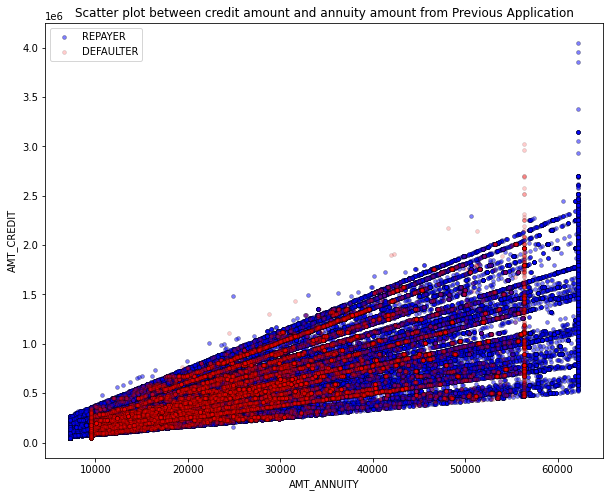

In [177]:
fig = plt.figure(figsize=(10,8))
plt.scatter(joined[joined["TARGET"]==0]['AMT_ANNUITY_y'],joined[joined["TARGET"]==0]['AMT_CREDIT_y'],s=15,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(joined[joined["TARGET"]==1]['AMT_ANNUITY_y'],joined[joined["TARGET"]==1]['AMT_CREDIT_y'],s=15,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":10})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount from Previous Application")
plt.show()

## 2 key aways
    - 1 From Application data
        Where the Loan annuity is more then 20,000 and Loan Amount is more then 2 Lacs then their is a huge drop of Defaulters
    - 2 From Previous Data
        We can say that above 40,000 their is a huge drop of Defaulters


In [185]:
#Lets see the percentage from previous Application

# People who repay on time
joined[joined["TARGET"]==0]['AMT_ANNUITY_y'].count()/joined['AMT_ANNUITY_y'].count()*100

91.8074466513432

In [187]:
# People who do not repay on time
joined[joined["TARGET"]==1]['AMT_ANNUITY_y'].count()/joined['AMT_ANNUITY_y'].count()*100

8.192553348656793